In [2]:
import pandas as pd
import numpy as np
from scipy.stats import mode
ROOT_DIR = './home-credit-credit-risk-model-stability/csv_files/train/'
TRAIN_CSV = 'train_applprev_1_0.csv'

train_df_1 = pd.read_csv(ROOT_DIR + TRAIN_CSV)

/var/folders/0t/j2gpn6f15654m27vbd8g7v1w0000gs/T/ipykernel_41455/2020819366.py:7: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df_1 = pd.read_csv(ROOT_DIR + TRAIN_CSV)


In [3]:
TRAIN_CSV_2 = 'train_applprev_1_1.csv'
train_df_2 = pd.read_csv(ROOT_DIR + TRAIN_CSV_2)

/var/folders/0t/j2gpn6f15654m27vbd8g7v1w0000gs/T/ipykernel_41455/1470883623.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df_2 = pd.read_csv(ROOT_DIR + TRAIN_CSV_2)


In [4]:
train_df = pd.concat([train_df_1, train_df_2], axis=0)

# Reset index if needed
train_df.reset_index(drop=True, inplace=True)

# Output the combined DataFrame
print(len(train_df))

6525979


In [5]:
import pandas as pd

# Reading the parquet file into a pandas DataFrame
df_train_base = pd.read_parquet('home-credit-credit-risk-model-stability/parquet_files/train/train_base.parquet')

# Converting 'date_decision' column to datetime
df_train_base['date_decision'] = pd.to_datetime(df_train_base['date_decision'])


In [5]:
def inspect_columns(df):
    
    result = pd.DataFrame({
        'unique': df.nunique() == len(df),
        'cardinality': df.nunique(),
        'with_null': df.isna().any(),
        'null_pct': round((df.isnull().sum() / len(df)) * 100, 2),
        '1st_row': df.iloc[0],
        'random_row': df.iloc[np.random.randint(low=0, high=len(df))],
        'last_row': df.iloc[-1],
        'dtype': df.dtypes
    })
    return result

In [6]:
import numpy as np

def inspect_continuous_columns(df):
    continuous_columns = df.columns[df.nunique() > 100]  # Filter columns with more than 100 unique values
    result = pd.DataFrame(columns=['mean', 'median', 'std', 'min', 'max', 'pct. 25%', 'pct. 75%'])
    
    for col in continuous_columns:
        # Convert non-numeric values to NaN and then to numeric
        numeric_values = pd.to_numeric(df[col], errors='coerce')
        numeric_values = numeric_values.dropna()  # Drop NaN values
        
        if not numeric_values.empty:
            stats = {
                'mean': numeric_values.mean(),
                'median': numeric_values.median(),
                'std': numeric_values.std(),
                'min': numeric_values.min(),
                'max': numeric_values.max(),
                'pct. 25%': numeric_values.quantile(0.25),
                'pct. 75%': numeric_values.quantile(0.75)
            }
            result.loc[col] = stats

    return result


In [217]:
continuous_stats = inspect_continuous_columns(train_df)

In [244]:
def custom_format(x):
    # print(x)
    if x % 1 == 0:
        return int(x)
    elif x == 0:
        return "0"
    else:
        return '%.2f' % x

# Set display options
pd.set_option('display.float_format', custom_format)

In [246]:
continuous_stats

,mean,median,std,min,max,pct. 25%,pct. 75%
case_id,1431940.94,1555975,787191.29,2,2703454,958657.50,1853312
actualdpd_943P,0.01,0,4.64,0,4206,0,0
annuity_853A,3449.52,2787,2884.08,0,105130.20,1711,4482.60
byoccupationinc_3656910L,20013.92,8000,30775.70,0,200000,1,30000
credacc_actualbalance_314A,18269.91,6103.17,27025.64,-134008.42,2540730,0,27514
credacc_credlmt_575A,3397.95,0,15100.40,0,400000,0,0
credacc_maxhisbal_375A,-2619.55,0,28826.24,-290265.10,7988198.50,0,0.19
credacc_minhisbal_90A,-6135.21,0,17500.89,-350532.60,239000,0,0
credacc_transactions_402L,0.55,0,3.09,0,155,0,0
credamount_590A,40409.36,28000,41139.42,0,1000000,14000,52792


In [239]:
med = continuous_stats.loc["byoccupationinc_3656910L"].loc["median"]

In [242]:
print("{:.10f}".format(med % 10))

0.0000000000


In [243]:
med % 1 == 0

True

In [5]:
eda_data = inspect_columns(train_df)

In [6]:
threshold = 10.0

In [7]:
eda_data

,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
case_id,False,1221522,False,0.00,2,2631445,2703454,int64
actualdpd_943P,False,189,True,0.04,0.0,0.0,0.0,float64
annuity_853A,False,89297,True,3.84,640.2,2983.0,6726.6,float64
approvaldate_319D,False,5402,True,46.13,NaN,NaN,2019-08-01,object
byoccupationinc_3656910L,False,29699,True,76.49,NaN,NaN,NaN,float64
cancelreason_3545846M,False,76,False,0.00,a55475b1,P94_109_143,a55475b1,object
childnum_21L,False,20,True,54.54,0.0,NaN,NaN,float64
creationdate_885D,False,5405,True,0.00,2013-04-03,2019-04-22,2019-08-01,object
credacc_actualbalance_314A,False,93621,True,95.10,NaN,NaN,NaN,float64
credacc_credlmt_575A,False,52331,True,2.97,0.0,0.0,0.0,float64


In [56]:
filtered_data = eda_data[eda_data["null_pct"] < threshold]

In [57]:
selected_columns = train_df.loc[:, filtered_data.index]

In [58]:
selected_columns 

,case_id,actualdpd_943P,annuity_853A,cancelreason_3545846M,creationdate_885D,credacc_credlmt_575A,credamount_590A,credtype_587L,district_544M,downpmt_134A,...,isbidproduct_390L,mainoccupationinc_437A,num_group1,pmtnum_8L,postype_4733339M,profession_152M,rejectreason_755M,rejectreasonclient_4145042M,status_219L,tenor_203L
0,2,0.0,640.20000,a55475b1,2013-04-03,0.0,10000.0,CAL,P136_108_173,0.0,...,False,8200.0,0,24.0,a55475b1,a55475b1,a55475b1,a55475b1,D,24.0
1,2,0.0,1682.40000,a55475b1,2013-04-03,0.0,16000.0,CAL,P136_108_173,0.0,...,False,8200.0,1,12.0,a55475b1,a55475b1,a55475b1,a55475b1,D,12.0
2,3,0.0,6140.00000,P94_109_143,2019-01-07,0.0,59999.8,CAL,P131_33_167,0.0,...,False,11000.0,0,12.0,a55475b1,a55475b1,P94_109_143,a55475b1,D,12.0
3,4,0.0,2556.60000,P24_27_36,2019-01-08,0.0,40000.0,CAL,P194_82_174,0.0,...,False,16000.0,0,24.0,a55475b1,a55475b1,a55475b1,a55475b1,T,24.0
4,5,0.0,NaN,P85_114_140,2019-01-16,NaN,NaN,NaN,P54_133_26,NaN,...,False,62000.0,0,NaN,a55475b1,a55475b1,a55475b1,a55475b1,T,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6525974,2703453,0.0,927.80000,a55475b1,2014-01-22,0.0,10000.0,CAL,P123_6_84,0.0,...,False,7000.0,6,18.0,P177_117_192,a55475b1,a55475b1,a55475b1,K,18.0
6525975,2703453,0.0,266.80002,a55475b1,2013-06-29,0.0,2198.0,COL,P123_6_84,0.0,...,False,7000.0,7,12.0,P177_117_192,a55475b1,a55475b1,a55475b1,K,12.0
6525976,2703453,0.0,416.20000,a55475b1,2013-06-29,0.0,2198.0,COL,P123_6_84,0.0,...,False,7000.0,8,6.0,P177_117_192,a55475b1,a55475b1,a55475b1,D,6.0
6525977,2703454,0.0,2986.80000,a55475b1,2020-06-21,0.0,15998.0,COL,P48_127_19,0.0,...,False,24000.0,0,6.0,P177_117_192,a55475b1,a55475b1,a55475b1,A,6.0


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_distribution(dataframe, column, bins='auto', title=None, xlabel=None, ylabel=None, drop_invalid=False):
    """
    Plot the distribution of a column in a DataFrame.
    
    Parameters:
    - dataframe: pandas.DataFrame
    - column: str, the column name to plot
    - bins: int or 'auto', the number of bins for continuous data or 'auto' for automatic binning
    """
    
    # Check if the column exists in the DataFrame
    if column not in dataframe.columns:
        print(f"Error: Column '{column}' not found in the DataFrame.")
        return

    # Drop NaNs or empties if specified
    if drop_invalid:
        dataframe = dataframe.dropna(subset=[column])
    plt.figure(figsize=(10, 6))
    
    # Check if the column is categorical (less than 100 unique values)
    if dataframe[column].nunique() < 100:  
        value_counts = dataframe[column].value_counts()
        plt.figure(figsize=(10, 6))
        value_counts.plot(kind='bar')
        plt.title(f'Distribution of {column} - Categorical')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        # Continuous data handling
        mean   = dataframe[column].mean()
        median = dataframe[column].median()
        mode_value = mode(dataframe[column])[0]
        
        plt.figure(figsize=(10, 6))
        dataframe[column].hist(bins=bins)
        # dataframe[column].plot()
        plt.title(f'Distribution of {column} - Continuous')
        
        plt.axvline(mean, color='red', linestyle='dashed', label='Mean')
        plt.axvline(median, color='green', linestyle='dashed', label='Median')
        plt.axvline(mode_value, color='blue', linestyle='dashed', label='Mode')
        
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.ylim(0, 10000)
        # plt.xlim(-110000, 110000)
    
        plt.title(title or f'Distribution of {column}, mean: {np.floor(mean)}, median: {np.floor(median)}, mode: {mode_value}')
        plt.xlabel(xlabel or f'{column} values')
        plt.ylabel(ylabel or 'Frequency')
              
    plt.legend()
    plt.grid(False)
    plt.show()

# Example usage
# Assuming `df` is your pandas DataFrame and `column_name` is the column you want to plot
# plot_distribution(df, 'column_name')

<Figure size 1000x600 with 0 Axes>

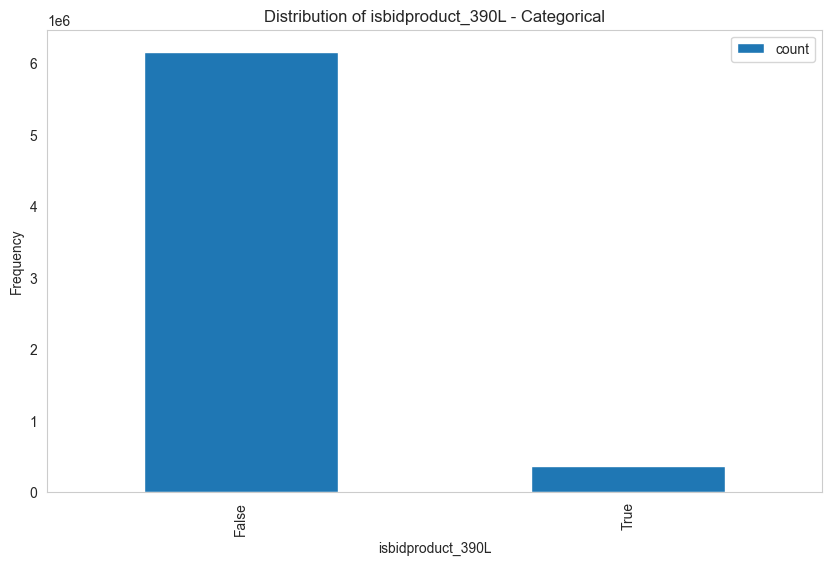

In [8]:
plot_distribution(train_df, "isbidproduct_390L")

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numerical_by_target_pandas(df_base, df, max_samples=1000000):
    # Merge the dataframes on 'case_id', assuming 'case_id' is a common column
    X = pd.merge(df_base, df, on='case_id', how='left')
    
    # Sample the dataframe if it's too large
    if len(X) > max_samples:
        X = X.sample(n=max_samples, random_state=0)
    
    # Filter columns that end with "L"
    columns_to_plot = [col for col in df.columns if col.endswith('L')]

    # Iterate over each filtered column and plot
    for col in columns_to_plot:
        # Define x and y for plotting
        y = X['target']
        x = X[col]
        
        fig, axes = plt.subplots(1, 2, figsize=(16, 4))  # Adjusted for a single group
        
        # Correctly using 'hue' for violin plot to avoid deprecation warning
        # Since 'x' is actually the category we're plotting by, 'hue' should also be the same to apply color coding
        sns.violinplot(x=x, y=y, hue=y, split=True, inner="quart", palette=['#add8e6', '#ffcc99'], ax=axes[0])
        axes[0].legend().set_visible(False)  # Hide the legend if not needed
        
        # Strip plot on the second subplot for the same data, using a specified color
        sns.stripplot(x=x, y=y, color='#6495ed', alpha=0.5, ax=axes[1])
        
        plt.tight_layout()
        plt.suptitle(f'Plots for {col}', y=1.02)  # Add a title with the column name
        plt.show()

# Example usage:
# Ensure df_base and df are pandas DataFrames.
# plot_numerical_by_target_pandas(df_base, df)

In [ ]:
plot_numerical_by_target_pandas(df_train_base, train_df)


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x158354d60> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [186]:
import pandas as pd

# Assuming `train_df` is your DataFrame and `credacc_actualbalance_314A` is the column of interest

# Count the number of zeros
count_zeros = (train_df['credacc_transactions_402L'] == 0).sum()

# Count the total number of non-NaN values
total_non_nan_values = train_df['credacc_transactions_402L'].notna().sum()

# Calculate the percentage of zeros
percentage_zeros = (count_zeros / total_non_nan_values) * 100

print(f"Percentage of 0 in 'credacc_transactions_402L' column: {percentage_zeros:.2f}%")

Percentage of 0 in 'credacc_transactions_402L' column: 88.99%


In [177]:
import pandas as pd

# Assuming `train_df` is your DataFrame and `credacc_actualbalance_314A` is the column of interest

# Count the number of zeros
count_zeros = ((train_df['credacc_minhisbal_90A'] < 1) & (train_df['credacc_minhisbal_90A'] > -1)).sum()


# Count the total number of non-NaN values
total_non_nan_values = train_df['credacc_minhisbal_90A'].notna().sum()

# Calculate the percentage of zeros
percentage_zeros = (count_zeros / total_non_nan_values) * 100

print(f"Percentage of [-10, 10] values in 'credacc_minhisbal_90A' column: {percentage_zeros:.2f}%")

Percentage of [-10, 10] values in 'credacc_minhisbal_90A' column: 61.19%


In [71]:
valid_case_ids

3253          7766
17610        42755
18792        45252
21592        50667
24517       103107
            ...   
1217052    2698944
1219604    2701496
1219654    2701546
1220608    2702500
1221238    2703143
Name: case_id, Length: 3875, dtype: int64

In [57]:
len(filtered_df)

6527

In [65]:
filtered_df["actualdpd_943P"]

7157       16.0
27718       NaN
35635       NaN
36414       NaN
36856       NaN
           ... 
6513870     3.0
6516313     NaN
6519462     NaN
6519916     2.0
6524115     1.0
Name: actualdpd_943P, Length: 6527, dtype: float64